## Some context on the TfidVectorizer and text handing in sklearn

* To represent a review to a neural network, each word has to be expressed as a number. 

* Each word in the review corpus is assigned a unique number. Assume the total number of unique words is feature_count. 

* Each review can then be represented as a vector of length feature_count. 

* Entries in this vector can be either 0 or 1, if the word is present in this review or absent respectively. 

* A more advanced approach will replace the binary numbers above with ratios that emphaise how rare ( and hence meanigful and representative ) the word is across all reviews. For example, a word like "product" will have little use for the neural network in determing whetehr this is a rating-1 or rating-5 review, as this particular word occurs in most reviews, both positive and negative ones. 

* Here we limit the number of feature_count to 40,000 to cut down the training time. 

more info available from 
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [261]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn #as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as pyplot
print("Done: Imports.")



# read the CSV file
df = pd.read_csv("sp500_27270.csv")
print("Done: reading the CSV.")






# Construct a correlation matrix
# Then sort the companies to get the companies that have values that are most correlated with the SP500
correlationMatrix = df.corr().abs()
# correlation = correlationMatrix['SP500'].sort_values(ascending=False)
correlation = correlation[correlation >= 0.95] #output
print(correlation)
print("Done: constructing the correlation matrix and filtering >= 0.95")








# filter the table and keep the most correlated companies only
print(correlation.index)
filteredDF = df.filter(items=correlation.index)
SP500 = filteredDF["SP500"]
filteredDF = filteredDF.drop(axis=1, labels="SP500") # remove the index itself
print("Done: keeping most correlated companies")









# Normalize!
spMean = SP500.mean()
spSD = SP500.std()
# normalizedSP500 = (SP500 - spMean) / spSD
# print(normalizedSP500)
normalizedSP500 = preprocessing.scale(SP500)
for column in filteredDF:
    filteredDF[column] = preprocessing.scale(filteredDF[column])
normlizedDF = filteredDF
# print(normalizedDF)
# print(normalizedDF[0])
print("Done: Normalizing.")





# Decide on the ratios of the tests
# say 0.7 training, 0.2 testing, 0.1 validation
trainingRatio = 0.8
testingRatio = 0.2
# validationRatio = 0.1
X_train,X_test,Y_train,Y_test = train_test_split(normalizedDF,normalizedSP500,test_size=0.2,random_state=1)
print("Done: deciding on the ratios and splitting the values.")








# let's use the mean square error as a scoring metric.
# Reason: the problem is a linear regression problem.


Done: Imports.
Done: reading the CSV.
SP500    1.000000
APH      0.988361
BRK.B    0.983833
TXN      0.982295
ROP      0.981822
UNH      0.981647
SPGI     0.980989
SNPS     0.980479
JPM      0.977905
CME      0.976921
ALL      0.976700
NTRS     0.976346
ADI      0.976134
STI      0.975756
FDX      0.975190
CTAS     0.975000
SYK      0.974447
TMO      0.974173
LLL      0.974072
ZTS      0.973370
CDNS     0.973219
MSFT     0.973043
BDX      0.971963
HRS      0.971382
SHW      0.971001
AET      0.970711
MAR      0.970689
ANTM     0.970581
AJG      0.970304
CSCO     0.969696
           ...   
YUM      0.963523
NEE      0.962797
IQV      0.962275
AMT      0.962243
LH       0.961746
WM       0.961264
ACN      0.960921
PGR      0.960835
COL      0.960783
EXPD     0.960540
BK       0.959471
ADBE     0.958978
RTN      0.958189
XYL      0.957460
MA       0.956718
CTXS     0.956092
KLAC     0.955578
RSG      0.955212
TSS      0.954631
JBHT     0.954544
ATVI     0.954096
A        0.953989
PLD     

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


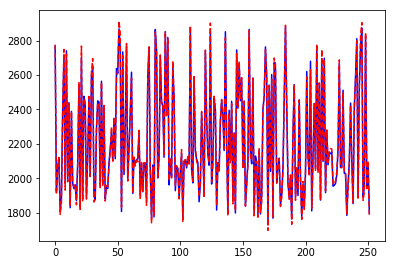

In [288]:
DoLinearRegression('adam',0.01, True, X_train, Y_train, X_test, Y_test)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.05, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


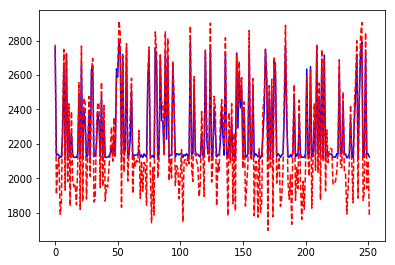

In [290]:
DoLinearRegression('adam', 0.05, True, X_train, Y_train, X_test, Y_test)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


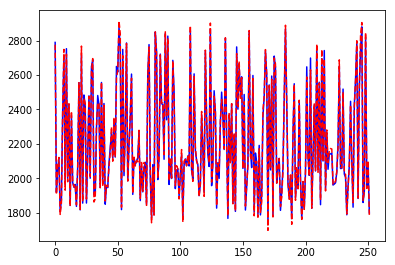

In [289]:
DoLinearRegression('adam', 0.1, True, X_train, Y_train, X_test, Y_test)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


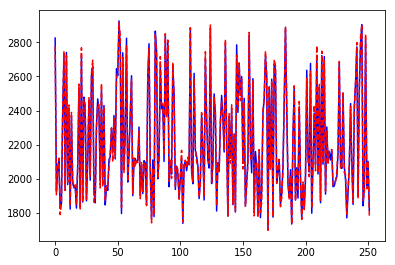

In [291]:
DoLinearRegression('sgd', 0.01, True, X_train, Y_train, X_test, Y_test)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


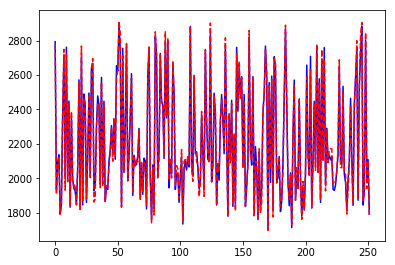

In [292]:
DoLinearRegression('sgd', 0.005, True, X_train, Y_train, X_test, Y_test)

In [287]:
"""function to use MLPRegressor, provide it with parameters and plot the results."""
def DoLinearRegression(solverInput, learning_rate_initInput, early_stopping, x_train, y_train, x_test, y_test):
    reg = MLPRegressor(
        hidden_layer_sizes=(5,),
        activation='relu',
        solver=solverInput,
        learning_rate='adaptive',
        max_iter=1000,
        learning_rate_init=learning_rate_initInput,
        alpha=0.01,
        early_stopping=early_stopping
    )

    reg.fit(x_train,y_train)
    print(reg)
    h = reg.predict(x_test)

    # denormalization
    deNorh = (h * spSD) + spMean
    deNorY_test = (y_test * spSD) + spMean

    fig = pyplot.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])

    ax.plot(deNorh,label='h(x)',color='blue',ls='-')
    ax.plot(deNorY_test,label="Y_test",color='red',ls='--')

    # difference = abs(h - Y_test)
    # ax.plot(difference,label='error',color='red',ls='-')

    # ax.plot([-2,-1,0,1,2],Y_test[0:limit],label='y_test',color='green',ls='--')
    # ax.plot(x,z,label='z',color='blue',ls='-.')

    pyplot.show()

In [294]:
# most correlated stock is APH with a score of 0.988361
# We can also use the mean square error as a scoring metric because this problem
# is also a linear regression problem.



# This problem is also a linear regression problem



# print(df)
# print(SP500)
mostCorrelatedStock = df["APH"]
# print(mostCorrelatedStock)

normalizedY = preprocessing.scale(SP500)
normalizedX = preprocessing.scale(mostCorrelatedStock)
trainingRatio = 0.8
testingRatio = 0.2
X_train,X_test,Y_train,Y_test = train_test_split(normalizedDF,normalizedSP500,test_size=0.2,random_state=1)


MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


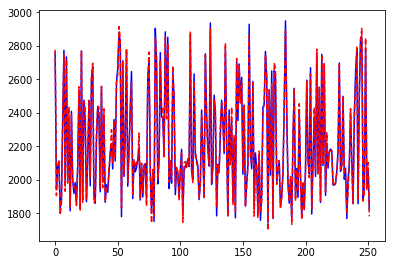

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


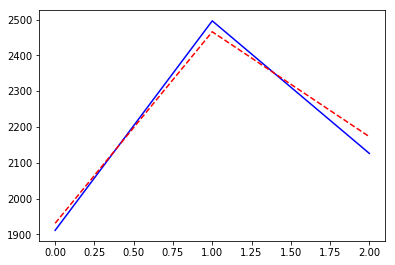

In [356]:
DoLinearRegression('sgd', 0.005, True, X_train, Y_train, X_test, Y_test)
# print(X_test)

random1 = np.random.randint(0,X_test.shape[0])
random2 = np.random.randint(0,X_test.shape[0])
random3 = np.random.randint(0,X_test.shape[0])
randomValues = [random1, random2, random3]

threeValuesX = np.array([X_test[random1],X_test[random2],X_test[random3]])
# print(threeValuesX)
# print(X_test[random1])
# threeValuesX = threeValuesX.append(X_test[random1])
# threeValuesX = threeValuesX.append(X_test[random2])
# threeValuesX = threeValuesX.append(X_test[random3])
# print(threeValues)



threeValuesY = np.array([Y_test[random1],Y_test[random2],Y_test[random3]])


# print(X_test)
# print(threeValuesX)
# print(type(X_test))
# print(type(threeValuesX))
DoLinearRegression('sgd', 0.005, True, X_train, Y_train, threeValuesX, threeValuesY)

Task 3

In [401]:
reviewsFile = pd.read_json(path_or_buf="reviews_Digital_Music_5.json", lines=True)
# print(reviewsFile)
# print(type(reviewsFile))

# print(len(reviewsFile["helpful" in [1,2,3,4,5]]))
# print(reviewsFile.filter())

# ratings = []
# for i in range(reviewsFile.shape[0]):
#     if not reviewsFile["overall"][i] in [1,2,3,4,5]:
#         print("corruption")
#     ratings.append(reviewsFile["overall"][i])
# print(ratings)

# Query Counts:
# print(reviewsFile.query('overall==1'))
# print("reviews with query 1")
print(len(reviewsFile.query('overall==1')))
print(len(reviewsFile.query('overall==2')))
print(len(reviewsFile.query('overall==3')))
print(len(reviewsFile.query('overall==4')))
print(len(reviewsFile.query('overall==5')))


# Select 2500 rows:
rating1 = reviewsFile.query('overall==1')[0:2500].dropna(how='all')
rating2 = reviewsFile.query('overall==2')[0:2500].dropna(how='all')
rating3 = reviewsFile.query('overall==3')[0:2500].dropna(how='all')
rating4 = reviewsFile.query('overall==4')[0:2500].dropna(how='all')
rating5 = reviewsFile.query('overall==5')[0:2500].dropna(how='all')

# print(type(rating1))
# rejoined = rating1.join(rating2)
rejoined = pd.concat([rating1, rating2, rating3, rating4, rating5], axis=0)
# print("test.")
# print(reviewsFile.ix[50])
# print("rejoined.")
# print(rejoined.shape[0])
# print(rejoined)

# print(reviewsFile)




#splitting to training and testing
trainingRatio = 0.8
testingRatio = 0.2
X_train,X_test,Y_train,Y_test = train_test_split(normalizedDF,normalizedSP500,test_size=0.2,random_state=1)
#using the TFIDFvectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

DoLinearRegression('adam',0.01, True, X_train_transformed, Y_train, X_test_transformed, Y_test)


2791
3010
6789
16536
35580
[[-0.74925703 -0.5978685  -0.90050688 ... -0.74657486 -0.73690696
  -0.84151973]
 [-0.83602877 -0.51005274 -0.83758068 ... -0.70417726 -0.62132077
  -0.86264324]
 [ 0.97128658  0.87693034  0.64497772 ...  0.88849738  1.10457219
   0.67581317]
 ...
 [ 1.44961175  1.5798178   1.45307643 ...  1.84068427  1.30555349
   1.1002459 ]
 [-0.7462861  -0.62099693 -0.92021037 ... -0.67025646 -0.73822795
  -0.83185973]
 [ 1.54452919  1.61234216  1.55741392 ...  1.40609863  1.56271457
   0.90230385]]


AttributeError: 'numpy.ndarray' object has no attribute 'lower'